# STAT207 Final Project - What Defines a Hit on Spotify?
Sasha Matveev, Geon Kim

## 1. Introduction

**a)** Title: Give your research report a title.

**b)** Motivation: Describe the motivation for why you or someone else would want to
explore your dataset (or a dataset of this type). You can give background
research (with citations) if this would help back up your motivation.

The music industry has gradually shifted towards streaming on platforms like Spotify, Apple Music, Tidal, and YouTube music just to name a few of the prominent platforms. Since music is no longer primarily sold in physical form, platforms and labels tend to measure the success of a record by the streams it generates on these platforms, which are then converted into equivalent physical unit sales. In analyzing the top 200 global hits on Spotify during 2020-2021 we aim to figure out the aspects of a record that may determine its success (or failure) commercially (defined as number of streams and/or position on the charts). For an entity like a record label, using empirical analysis to determine the musical aspects of a song may be beneficial as they may ask their artists to tailor their work to exhibit certain categories that have statistically been proven to be commercially viable. 

https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021

**c)** Research Questions: You will answer at least four sets of research questions. In
your introduction, you should briefly describe why you (or someone else) would
be interested in answering these research questions. How could the answers to
these research questions be used?






1) Descriptive Analytics: Is the loudness of the song proportional to the energy measurement? How does this relationship between loudness and energy change for different artists that have at least 5 million streams (total)?
   
   
2) Inference Research: Is there an association between the number of streams and different genres (latin vs pop) in all songs on Spotify?


3) Linear Regression: Is there a linear relationship between the highest charting position a song attains and its danceability, speechiness, duration, and valence among the songs that charted in top 200 globally during 2020-2021? What about all songs on Spotify?


4) Logistic Regression: Is there a linear relationship between the log-odds of the number of songs successfully charted at least 10 times and Danceability, Energy, Speechiness, Duration, Valence in the sample of top 200 global songs in 2020-2021? What about all songs on Spotify in that time period?

**d)** Dataset: Display at least 6 observations from your dataframe in this section and
show how many rows and columns it has.

In [2]:
#Imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm
from scipy.stats import t 
from scipy.stats import f
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df=pd.read_csv('spotify_dataset.csv')
df.head(6)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
5,6,1,18,2021-05-07--2021-05-14,MONTERO (Call Me By Your Name),"30,071,134",Lil Nas X,5473565,67BtfxlNbhBmCDR2L2l8qd,"['lgbtq+ hip hop', 'pop rap']",...,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758,G#/Ab


In [4]:
df.shape

(1556, 23)

In [5]:
df['Streams'] = df['Streams'].str.replace(',', '').astype(int)
df['Streams'] = pd.to_numeric(df['Streams'])
df['Loudness'] = pd.to_numeric(df['Loudness'], errors='coerce')
df['Energy'] = pd.to_numeric(df['Energy'], errors='coerce')
df['Highest Charting Position']= pd.to_numeric(df['Highest Charting Position'], errors='coerce')
df['Danceability']=pd.to_numeric(df['Danceability'], errors='coerce')
df['Speechiness']=pd.to_numeric(df['Speechiness'], errors='coerce')
df['Duration (ms)']=pd.to_numeric(df['Duration (ms)'], errors='coerce')
df['Valence']=pd.to_numeric(df['Valence'], errors='coerce')

In [6]:
df=df.dropna()

**e)** Think Critically: What limitations exist within your data? What information is
included in your data? What information (observations or variables) is not
included in your data? What might you want to add? Are there any practical or
ethical considerations for this data? You don’t need to answer all of these
questions, but you should answer some.


There are several limitations within the data. For instance, the data is limited to 1556 observations while there are artists that have way more than 1556 in their discography alone. In addition, it is not possible to see the country of origin of the artist or the language of the song. There is data about the genre that contains some geographical metadata but it is fairly limited. Ideally we would add data about the artists such as their country of origin, and primary language of the song. This would help to see how different languages of songs influence their popularity and commercial success. The data is taken from the top 200 songs on the global charts between 2020 and 2021 and contains information such as the number of streams it got, the artist and song name, its genre, when it was released, what its highest spot on global 200 charts was and when it obtained its highest spot. 

## 2. Descriptive Analytics

**a)** Goal: You should pick three or more variables and explore the relationship
between these variables in the dataset.
-  For instance, you could ask “What is the relationship between x and y in
this dataset? Furthermore, how does this relationship between x and y
change for different values of z?”

Variable choice: Energy, Loudness, Streams


**b)** State your research question you will answer with your analysis. Remember,
descriptive analytics only involves describing relationships in the dataset that you
have, so your research question should be just about the dataset.

Question: Is the loudness of the song proportional to the energy measurement? How does this relationship between loudness and energy change for different artists that have at least 10 million streams (total)?

**c)** Use at least one visualization to answer this question. You should have at least
one visualization that incorporates 3 or more variables in the same plot.

In [7]:
df['Over 5M streams'] = df['Streams']>=5000000
df['Over 5M streams'].value_counts()

True 1069
False 476
Name: Over 5M streams, dtype: int64

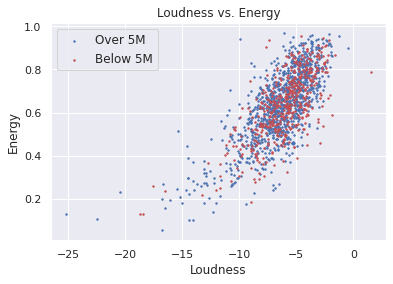

In [8]:
df_Over_5M = df[df['Over 5M streams']==True]
df_Below_5M = df[df['Over 5M streams']==False]

plt.scatter(df_Over_5M['Loudness'], df_Over_5M['Energy'], label='Over 5M', c='b', s=2)
plt.scatter(df_Below_5M['Loudness'], df_Below_5M['Energy'], label='Below 5M', c='r', s=2)
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Loudness vs. Energy')
plt.legend(loc='upper left', fontsize='medium')
plt.show()

**d)** Use at least one set of summary statistics to help answer this question as well.

In [9]:
corr_below_5M = df_Below_5M['Loudness'].corr(df_Below_5M['Energy'])
corr_over_5M = df_Over_5M['Loudness'].corr(df_Over_5M['Energy'])
corr_below_5M, corr_over_5M

(0.7094161862174566, 0.7436691180089373)

**e)** Describe what you see in your visualization and summary statistics, what they tell
you, and how they help answer your research question.

The visualization clearly indicates a positive correlation between loudness and energy. The correlation coefficients for both datasets (below and above 5 million streams) are greater than 0.7, confirming a strong linear relationship with positive correlation.

Based on these results, we can conclude that the loudness of a song is directly proportional to its energy measurement. Furthermore, the relationship between loudness and energy appears to be consistent regardless of the number of streams.

## 3. Inference

**a)** Goal: You should pick two variables (at least one categorical) and explore the
relationship between these variables in a population.
1. For instance, you could ask “Is there an association between x and y in
my population?”
2. Choose one of the following types of inference parameters: difference in
two population proportions, difference of two population means, or
challenge yourself with ANOVA.

**b)** State your research question that you will answer with your analysis. Remember,
inferential statistics involves answering research questions about populations
given a random sample from that population. Your research question should
reference the population from which your data were collected.

**c)** Complete at least one hypothesis test to answer this research question, including
1. Stating your hypotheses,
2. Checking the conditions for this test,
3. Calculating a p-value (or confidence interval) for this test by hand, and
4. Using your results to state a conclusion.
   
**d)** Finally, discuss how your conclusion answers your research question

B) Inference Research: Is there an association between the number of streams and different genres (pop vs latin) in all songs on Spotify?

  C) Differences of 2 population means
  
  $\mu_1$:(['dance pop', 'pop', 'post-teen pop']) true mean number of streams
  
  $\mu_2$:(['latin', 'reggaeton', 'trap latino']) true mean number of streams


In [10]:
df_pop=df[df['Genre'] == "['dance pop', 'pop', 'post-teen pop']"]                                                       
df_pop.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Over 5M streams
30,31,5,21,2021-04-09--2021-04-16,Leave The Door Open,13963568,"Bruno Mars, Anderson .Paak, Silk Sonic",32574754,7MAibcTli4IisCtbHKrGMh,"['dance pop', 'pop', 'post-teen pop']",...,0.616,-7.964,0.0324,0.182,0.0927,148.088,242096.0,0.719,F,True
91,92,1,40,2020-10-30--2020-11-06,positions,7244853,Ariana Grande,67158068,35mvY5S1H3J2QZyna3TFe0,"['dance pop', 'pop', 'post-teen pop']",...,0.802,-4.771,0.0878,0.468,0.0931,144.015,172325.0,0.682,C,True
105,106,45,19,2021-04-30--2021-05-07,Talking to the Moon,6660319,Bruno Mars,32574754,161DnLWsx1i3u1JT05lzqU,"['dance pop', 'pop', 'post-teen pop']",...,0.606,-4.754,0.0301,0.512,0.106,145.837,217867.0,0.065,C#/Db,True
147,148,59,83,2020-01-03--2020-01-10,Shallow,5672480,"Lady Gaga, Bradley Cooper",18572085,2VxeLyX666F8uXCJ0dZF8B,"['dance pop', 'pop', 'post-teen pop']",...,0.385,-6.362,0.0308,0.371,0.231,95.799,215733.0,0.323,G,True
165,166,59,18,2021-05-07--2021-05-14,Cover Me In Sunshine,5434073,"P!nk, Willow Sage Hart",11477164,6Tio0ZoDeSQnI7EBAqWer2,"['dance pop', 'pop', 'post-teen pop']",...,0.594,-6.879,0.1350,0.0599,0.0785,159.702,141050.0,0.314,F,True


In [11]:
df_latin=df[df['Genre'] == "['latin', 'reggaeton', 'trap latino']"]                                                       
df_latin.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Over 5M streams
8,9,3,8,2021-06-18--2021-06-25,Yonaguni,25030128,Bad Bunny,36142273,2JPLbjOn0wPCngEot2STUS,"['latin', 'reggaeton', 'trap latino']",...,0.648,-4.601,0.1180,0.276,0.135,179.951,206710.0,0.440,C#/Db,True
18,19,14,5,2021-07-02--2021-07-09,AM Remix,17617965,"Nio Garcia, J Balvin, Bad Bunny",2123734,05bfbizlM5AX6Mf1RRyMho,"['latin', 'reggaeton', 'trap latino']",...,0.655,-5.015,0.1590,0.114,0.0764,172.031,261335.0,0.785,F#/Gb,True
39,40,1,39,2021-01-01--2021-01-08,DÁKITI,11524288,"Bad Bunny, Jhay Cortez",36142273,4MzXwWMhyBbmu6hOcLVD49,"['latin', 'reggaeton', 'trap latino']",...,0.573,-10.059,0.0544,0.401,0.113,109.928,205090.0,0.145,E,True
73,74,74,8,2021-07-23--2021-07-30,Loco,8093413,"Justin Quiles, Chimbala, Zion & Lennox",2895789,6PDlkWmrq2ZKiUuFt2aQsH,"['latin', 'reggaeton', 'trap latino']",...,0.899,-2.981,0.0494,0.222,0.0894,128.05,231604.0,0.851,G#/Ab,True
121,122,2,35,2020-11-27--2020-12-04,LA NOCHE DE ANOCHE,6242863,"Bad Bunny, ROSALÍA",36142273,2XIc1pqjXV3Cr2BQUGNBck,"['latin', 'reggaeton', 'trap latino']",...,0.618,-4.892,0.2860,0.0303,0.0866,81.993,203201.0,0.391,G,True


$H_0$: $\mu_1=\mu_2$

$H_1$: $\mu_1 \neq \mu_2$

where:  
$\mu_1$:(['dance pop', 'pop', 'post-teen pop']) true mean number of streams

$\mu_2$:(['latin', 'reggaeton', 'trap latino']) true mean number of streams

I will take a random sample of 50 songs from each df to ensure integrity of hypothesis testing.

In [12]:
df_pop_50=df_pop.sample(n=50, random_state=123)
df_latin_50=df_latin.sample(n=50, random_state=123)

Assumptions:
1) Random sample (can assume)
2) n1(50)<0.1(N1) (yes, there are more than 500 pop songs on spotify)
3) n2(50)<0.1(N2) (yes, there are more than 500 latin songs on spotify)
4) n1(50)>30 (yes)
5) n2(50)>30 (yes)
6) No pairwise relationship between songs in this sample

In [13]:
import numpy as np
pop_xbar=df_pop_50.Streams.mean()
latin_xbar=df_latin_50.Streams.mean()

pop_sd=df_pop_50.Streams.std()
latin_sd=df_latin_50.Streams.std()

std_err=np.sqrt(((pop_sd**2)/50)+ ((latin_sd**2)/50))
test_stat=(pop_xbar-latin_xbar-0)/std_err
print(test_stat)

-0.4422743846609403


In [14]:
pval= 2*(t.cdf(test_stat, df=len(df_latin)))
print(pval)

0.659805320098837


Because the p-value=.6598 and alpha =0.05 we fail to reject the null hypothesis. There is not enough statistically significant evidence to suggest that $\mu_1\ \neq \mu_2$, that is, the true mean number of streams for pop-genre songs is different than the true mean number of streams for the latin genre. There is also no statistically significant association between the pop and latin genre and the true mean number of streams that songs in their generes will generate.

D) Through the hypothesis test, we can see that the whether the genere of the song is latin or pop does not impact its success. There is no statistically significant evidence to suggest that making a song in one genere will generate more streams that making it in the other genere (latin vs pop). This suggests that these 2 generes do not affect the success of failure of a song as defined by its total number of streams.

## 4. Linear Regression

**a)** Goal: You should pick a numeric response variable and at least four explanatory
variables that you suspect might affect your response variable. Explore whether
there is a linear relationship between the explanatory variables and the response
variable, in the dataset and in the population.

1) For instance, you could ask two questions like: “Is there a linear
relationship between y and x1, x2, x3, and x4 in the sample? What about
in the relevant population?”

b. State your research question(s) you’d like to answer with your analysis.

c. Use at least one linear regression model to answer this question. Include the
following:

1) Show the summary output for your linear regression.

2) Write out the linear regression equation for your model. Use appropriate
    notation.

3) Check the linear regression conditions. If they are not met, try
    transforming one of the variables (maybe with a natural log) and see if
    that helps meet the conditions. If you have multicollinear explanatory
    variables, try dropping one. (If dropping a multicollinear variable brings
    you below the four required explanatory variables, this is ok. Be sure you
    show the progression of your analysis, including your model with at least
    four variables.).

4) Discuss what percent of variability in your response variable is explained
    by this model in the dataset. Is this high? Is this low?

5) Make at least one prediction with your model.

6) Which slopes in your model do we have sufficient evidence to suggest are
    non-zero in the population model? Explain your answer.

d. Finally, discuss how your linear regression analysis helps answer your research question

Linear Regression: Is there a linear relationship between the highest charting position and danceability, speechiness, duration, and valence?

In [15]:
(df['Valence']).value_counts()

0.405 7
0.580 7
0.835 6
0.429 6
0.437 6
 ..
0.477 1
0.643 1
0.872 1
0.672 1
0.933 1
Name: Valence, Length: 731, dtype: int64

In [16]:
model = smf.ols('Q("Highest Charting Position") ~ Danceability + Speechiness+ Q("Duration (ms)") + Valence',data=df).fit()
model.summary()

OLS Regression Results 
 
 Dep. Variable: Q("Highest Charting Position") R-squared: 0.004 
 
 
 Model: OLS Adj. R-squared: 0.002 
 
 
 Method: Least Squares F-statistic: 1.690 
 
 
 Date: Thu, 04 May 2023 Prob (F-statistic): 0.150 
 
 
 Time: 01:08:49 Log-Likelihood: -8465.3 
 
 
 No. Observations: 1545 AIC: 1.694e+04 
 
 
 Df Residuals: 1540 BIC: 1.697e+04 
 
 
 Df Model: 4 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 Intercept 88.8568 10.215 8.699 0.000 68.820 108.893 
 
 
 Danceability -4.5452 11.476 -0.396 0.692 -27.055 17.965 
 
 
 Speechiness 20.9820 13.841 1.516 0.130 -6.168 48.132 
 
 
 Q("Duration (ms)") -3.222e-05 3.17e-05 -1.016 0.310 -9.45e-05 3e-05 
 
 
 Valence 11.4405 7.015 1.631 0.103 -2.319 25.200 
 
 
 
 
 Omnibus: 602.769 Durbin-Watson: 1.568 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 96.023 
 
 
 Skew: 0.268 Prob(JB): 1.41e-21 
 
 
 Kurtosis: 1.903 Cond. No. 2.05e+06 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The condition number is large, 2.05e+06. This might indicate that there are strong multicollinearity or other numerical problems.

Text(0.5, 0, 'Fitted Value')

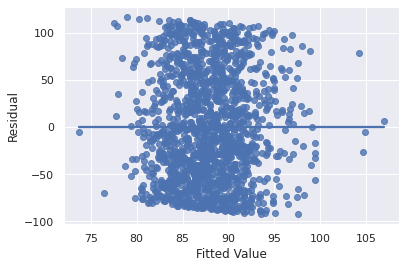

In [17]:
import seaborn as sns; sns.set()
sns.regplot(x=model.fittedvalues, y=model.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')

Text(0.5, 0, 'Residuals')

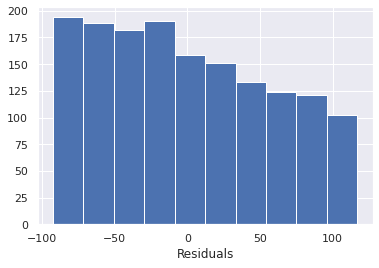

In [18]:
plt.hist(model.resid)
plt.xlabel('Residuals')

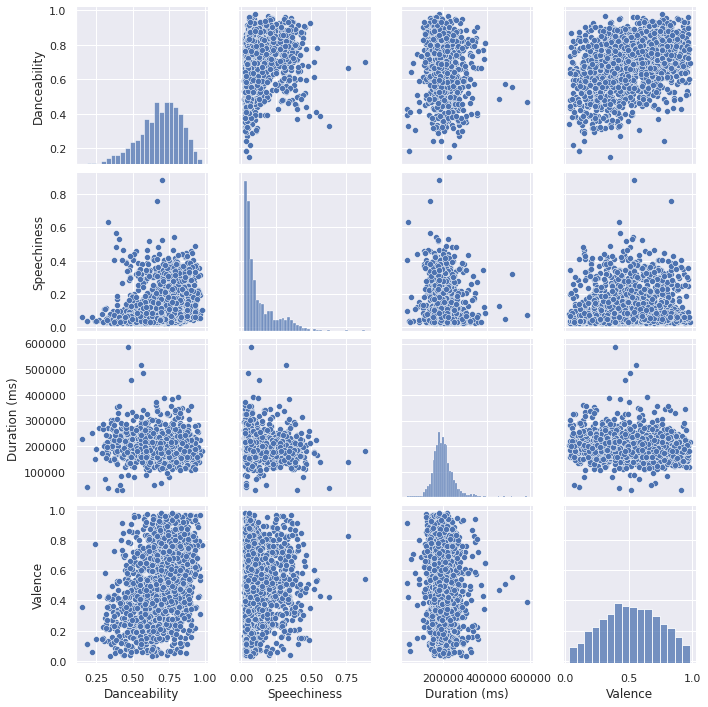

In [19]:
sns.pairplot(df[['Danceability', 'Speechiness', 'Duration (ms)', 'Valence']])

Linearity- The distribution of points in the plot below are roughly evenly distributed above and below the line
as we move from left to right (condition met)

Indepence- The data is randomly sampled and n=731<0.1(All spotify songs) (condition met)

Normality- The Residuals is clearly not normal and is skewed right heavily (condition not met proceed with caution)

Equal Variance- The y‑axis spread of points in the plot below slightly change as we move from left to right so this condition is slightly not met

Multicollinearity- None of the variables appear to be strongly correlated with each other (condition met)

In [20]:
df['log_duration']=np.log(df['Duration (ms)'])
df['log_danceability']=np.log(df['Danceability'])
df['log_speechiness']=np.log(df['Speechiness'])
df['log_valence']=np.log(df['Valence'])

In [21]:
model1 = smf.ols('Q("Highest Charting Position") ~ Danceability+ Speechiness+ log_duration + log_valence',data=df).fit()
model1.summary()

OLS Regression Results 
 
 Dep. Variable: Q("Highest Charting Position") R-squared: 0.006 
 
 
 Model: OLS Adj. R-squared: 0.004 
 
 
 Method: Least Squares F-statistic: 2.429 
 
 
 Date: Thu, 04 May 2023 Prob (F-statistic): 0.0460 
 
 
 Time: 01:08:53 Log-Likelihood: -8463.8 
 
 
 No. Observations: 1545 AIC: 1.694e+04 
 
 
 Df Residuals: 1540 BIC: 1.696e+04 
 
 
 Df Model: 4 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 Intercept 202.1155 74.278 2.721 0.007 56.419 347.812 
 
 
 Danceability -5.6350 11.416 -0.494 0.622 -28.028 16.758 
 
 
 Speechiness 19.4815 13.847 1.407 0.160 -7.680 46.643 
 
 
 log_duration -8.9068 6.067 -1.468 0.142 -20.808 2.994 
 
 
 log_valence 5.5435 2.693 2.058 0.040 0.261 10.826 
 
 
 
 
 Omnibus: 585.228 Durbin-Watson: 1.565 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 95.480 
 
 
 Skew: 0.269 Prob(JB): 1.85e-21 
 
 
 Kurtosis: 1.908 Cond. No. 619. 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

Text(0.5, 0, 'Fitted Value')

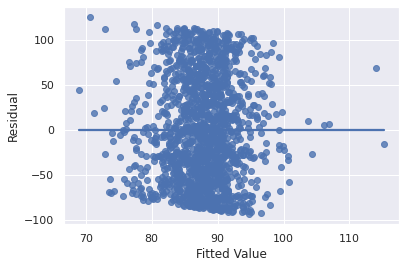

In [22]:
sns.regplot(x=model1.fittedvalues, y=model1.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')

Text(0.5, 0, 'Residuals')

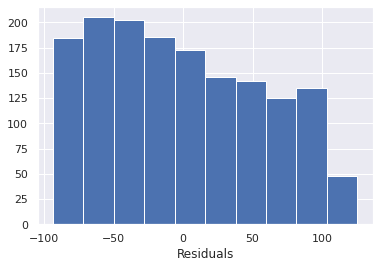

In [23]:
plt.hist(model1.resid)
plt.xlabel('Residuals')

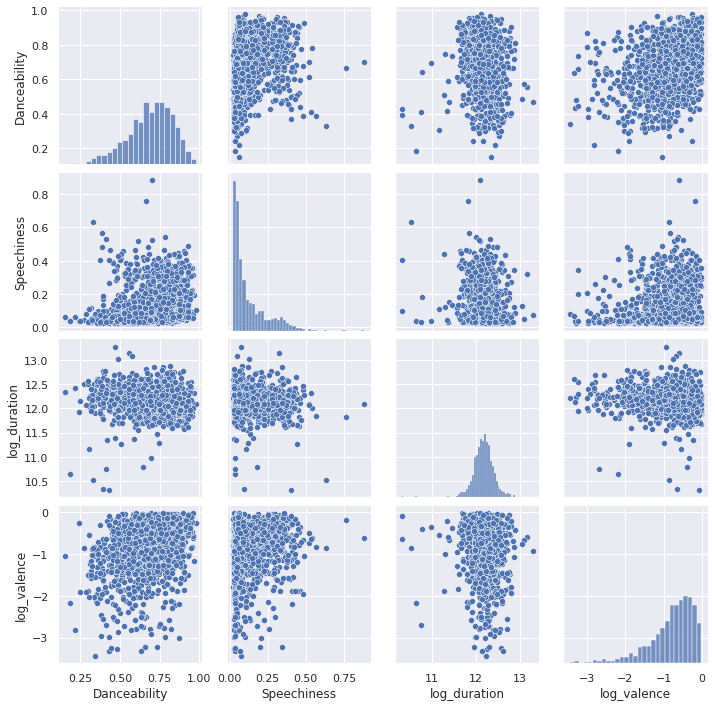

In [24]:
sns.pairplot(df[['Danceability', 'Speechiness', 'log_duration', 'log_valence']])

In [25]:
df[['Danceability', 'log_valence']].corr()

,Danceability,log_valence
Danceability,1.000000,0.358944
log_valence,0.358944,1.000000


Taking the natural log of valence and duration helped bring the r2 up to 0.006 and adjusted r2 to .004 but it did not rectify the failed normality conditions equal variance violations. Danceability and log_valence now appear to be more clearly correlated so I will remove Danceability in my final model to improve it slightly.

In [26]:
model2 = smf.ols('Q("Highest Charting Position") ~  Speechiness+ log_duration + log_valence',data=df).fit()
model2.summary()

OLS Regression Results 
 
 Dep. Variable: Q("Highest Charting Position") R-squared: 0.006 
 
 
 Model: OLS Adj. R-squared: 0.004 
 
 
 Method: Least Squares F-statistic: 3.159 
 
 
 Date: Thu, 04 May 2023 Prob (F-statistic): 0.0239 
 
 
 Time: 01:08:59 Log-Likelihood: -8463.9 
 
 
 No. Observations: 1545 AIC: 1.694e+04 
 
 
 Df Residuals: 1541 BIC: 1.696e+04 
 
 
 Df Model: 3 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 Intercept 198.2576 73.847 2.685 0.007 53.406 343.110 
 
 
 Speechiness 17.9061 13.471 1.329 0.184 -8.517 44.330 
 
 
 log_duration -8.9242 6.066 -1.471 0.141 -20.822 2.973 
 
 
 log_valence 5.0726 2.518 2.015 0.044 0.134 10.012 
 
 
 
 
 Omnibus: 582.422 Durbin-Watson: 1.567 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 95.509 
 
 
 Skew: 0.270 Prob(JB): 1.82e-21 
 
 
 Kurtosis: 1.909 Cond. No. 615. 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In [27]:
print(model.rsquared, model.rsquared_adj)
print(model1.rsquared, model1.rsquared_adj)
print(model2.rsquared, model2.rsquared_adj)

0.004369258271038401 0.0017832043964178812
0.006269394426925534 0.003688275970891719
0.006112181331043742 0.0041772926509614505


Text(0.5, 0, 'Fitted Value')

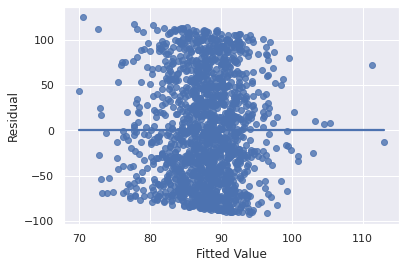

In [28]:
sns.regplot(x=model2.fittedvalues, y=model2.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')

Text(0.5, 0, 'Residuals')

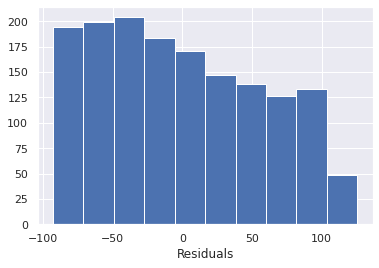

In [29]:
plt.hist(model2.resid)
plt.xlabel('Residuals')

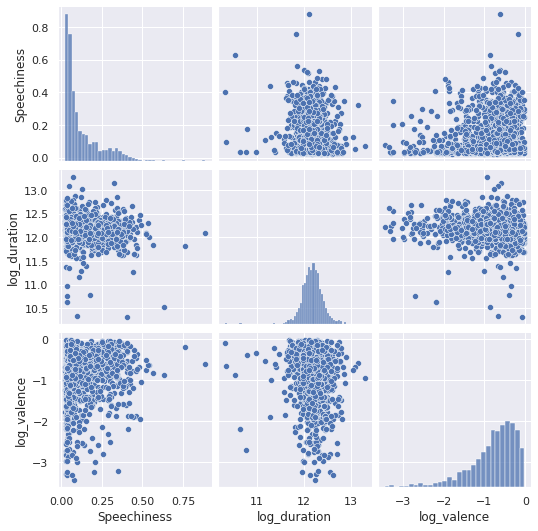

In [30]:
sns.pairplot(df[['Speechiness', 'log_duration', 'log_valence']])

Removing danceability did not help with the equal variance failure or the normality failure but it does bring the adjusted r2 higher, suggesting a slightly better fit.

In [31]:
final_model=model2
final_model.summary()

OLS Regression Results 
 
 Dep. Variable: Q("Highest Charting Position") R-squared: 0.006 
 
 
 Model: OLS Adj. R-squared: 0.004 
 
 
 Method: Least Squares F-statistic: 3.159 
 
 
 Date: Thu, 04 May 2023 Prob (F-statistic): 0.0239 
 
 
 Time: 01:09:02 Log-Likelihood: -8463.9 
 
 
 No. Observations: 1545 AIC: 1.694e+04 
 
 
 Df Residuals: 1541 BIC: 1.696e+04 
 
 
 Df Model: 3 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 Intercept 198.2576 73.847 2.685 0.007 53.406 343.110 
 
 
 Speechiness 17.9061 13.471 1.329 0.184 -8.517 44.330 
 
 
 log_duration -8.9242 6.066 -1.471 0.141 -20.822 2.973 
 
 
 log_valence 5.0726 2.518 2.015 0.044 0.134 10.012 
 
 
 
 
 Omnibus: 582.422 Durbin-Watson: 1.567 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 95.509 
 
 
 Skew: 0.270 Prob(JB): 1.82e-21 
 
 
 Kurtosis: 1.909 Cond. No. 615. 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

Highest charting position_hat= 17.9061(speechiness) + -8.9242(log Duration (ms)) + 5.0726(log Valence)

About .006 percent of variability in the highest charting position is explained by this model in the dataset. This is very low for the model. 

In [32]:
df.Speechiness.value_counts()

0.1020 15
0.1330 8
0.1160 8
0.0287 7
0.1530 7
 ..
0.8840 1
0.0880 1
0.4100 1
0.0676 1
0.0640 1
Name: Speechiness, Length: 771, dtype: int64

In [33]:
df.log_valence.value_counts()

-0.903868 7
-0.544727 7
-0.180324 6
-0.846298 6
-0.827822 6
 ..
-0.740239 1
-0.441611 1
-0.136966 1
-0.397497 1
-0.069350 1
Name: log_valence, Length: 731, dtype: int64

In [34]:
df.log_duration.value_counts()

12.268423 3
12.100712 3
12.182952 3
12.000296 3
12.158352 3
 ..
11.960364 1
12.214343 1
12.030927 1
12.292924 1
12.307306 1
Name: log_duration, Length: 1485, dtype: int64

In [35]:
final_model.predict(exog=dict(Speechiness=.5,log_valence=5, log_duration=12))

0 125.482876
dtype: float64

A song that contains both music and words (speechiness between 0.33 and 0.66) with a valence (happy/cheerfulness) log value of 5 and duration of about 5 minutes (5 mins=30,000 ms, log (30,000)= 12) will peak on the global charts at about number 125.

In [36]:
final_model.summary()

OLS Regression Results 
 
 Dep. Variable: Q("Highest Charting Position") R-squared: 0.006 
 
 
 Model: OLS Adj. R-squared: 0.004 
 
 
 Method: Least Squares F-statistic: 3.159 
 
 
 Date: Thu, 04 May 2023 Prob (F-statistic): 0.0239 
 
 
 Time: 01:09:03 Log-Likelihood: -8463.9 
 
 
 No. Observations: 1545 AIC: 1.694e+04 
 
 
 Df Residuals: 1541 BIC: 1.696e+04 
 
 
 Df Model: 3 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 Intercept 198.2576 73.847 2.685 0.007 53.406 343.110 
 
 
 Speechiness 17.9061 13.471 1.329 0.184 -8.517 44.330 
 
 
 log_duration -8.9242 6.066 -1.471 0.141 -20.822 2.973 
 
 
 log_valence 5.0726 2.518 2.015 0.044 0.134 10.012 
 
 
 
 
 Omnibus: 582.422 Durbin-Watson: 1.567 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 95.509 
 
 
 Skew: 0.270 Prob(JB): 1.82e-21 
 
 
 Kurtosis: 1.909 Cond. No. 615. 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

Only the slope of log valence is likely non-zero. The 95% confidence interval (.134, 10.012) gives us enough statistically significant evidence at an alpha of 0.05 to suggest that the true value of the coefficient of speechiness is nonzero since 0 is not contained within the 95% confidence interval. The other 2 variables in the final model, speechiness and log_duration have confidence intervals for the coefficients (slope) of (-8.517, 44.330) and (-20.822, 2.973) respectively. Since those 95% confidence intervals for the true coefficient (slope) values contain 0, we can say that at an alpha of 0.05 we do not have enough statistically significant evidence that the slope is nonzero. 



The linear regression analysis reveals that we do not have a solid linear model to predict a song's success measured as its highest charting position based on its speechiness, log valence, and log duration. The analysis suggests that either the predictor variables of valence, danceability(dropped), valence, and duration in ms are not sound predictors of a song's highest charting position or that the relationship is nonlinear. 

## 5. Logistic Regression

**a)** Goal: You should pick (or make) a categorical response variable with two levels
and at least four explanatory variables that you suspect might affect your
response variable. Explore whether there is a linear relationship between the
explanatory variables and the log-odds of the success level of the response
variable, in the dataset and in the population.

i. For instance, you could ask questions like: “Is there a linear relationship
between the log-odds of the success level of y and x1, x2, x3, and x4 in
the sample? What about in the relevant population? What explanatory
variables should we include in the model to build a parsimonious model?”

ii. Hint: You can create a 0/1 categorical variable from a categorical variable
using the map function or from a numeric variable by modifying the code:
df[‘new_cat_var’] = 1 * (df[‘num_var’] >=
some_number)

Categorical response variable: Number of songs charted more than or equal to 10 times

Explanatory variables: Danceability, Energy, Speechiness, Duration, Valence

**b)** State your research question(s) you’d like to answer with your analysis.

Is there a linear relationship between the log-odds of the number of songs successfully charted more than or equal to 10 times and Danceability, Energy, Speechiness, Duration, Valence in the sample?

**c)** Use at least one logistic regression model to answer this question. Include the
following:

i. Split your dataset into a training dataset and testing dataset.

ii. Starting with four (or more) explanatory variables and using your training
dataset, perform a backwards elimination algorithm (using AIC or BIC) to
help you find a parsimonious logistic regression model. We will discuss
this during lecture in mid-April.

iii. Then fit your final parsimonious logistic regression model with just your
training dataset.

iv. Show the summary output for your final logistic regression model.

v. Write out the logistic regression equation for your final model.

vi. Which slopes in your final model do we have sufficient evidence to
suggest are non-zero in the population model? Explain your answer.

vii. Use your logistic regression model to calculate the ROC and AUC of your
test dataset.

viii. Use your ROC to pick a good predictive probability threshold. Explain
why this is a good predictive probability threshold, given your research
goals.

ix. Use this predictive probability threshold to classify your test data. What is
the false positive rate and the true positive rate of your classification of
the test data?

In [37]:
df[df['Number of Times Charted']>=50].shape, df.shape

((62, 28), (1545, 28))

In [38]:
df['y'] = 1*(df['Number of Times Charted']>=10)

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.20, random_state=111)
df_train.shape[0], df_test.shape[0]

(1236, 309)

In [39]:
mod_all_5 = smf.logit('y ~ Danceability + Energy + Speechiness + Q("Duration (ms)") + Valence', data=df_train).fit()
print('BIC_5', mod_all_5.bic)

Optimization terminated successfully.
         Current function value: 0.606217
         Iterations 5
BIC_5 1541.2868442454708


In [40]:
# exclude one
mod_Danceability = smf.logit('y ~ Energy + Speechiness + Q("Duration (ms)") + Valence', data=df_train).fit()
print('BIC-Dance', mod_Danceability.bic)

mod_Energy = smf.logit('y ~ Danceability + Speechiness + Q("Duration (ms)") + Valence', data=df_train).fit()
print('BIC-Energy', mod_Energy.bic)

mod_Speechiness = smf.logit('y ~ Danceability + Energy + Q("Duration (ms)") + Valence', data=df_train).fit()
print('BIC-Speechiness', mod_Speechiness.bic)

mod_Duration = smf.logit('y ~ Danceability + Energy + Speechiness + Valence', data=df_train).fit()
print('BIC-Duration', mod_Duration.bic)

mod_Valence = smf.logit('y ~ Danceability + Energy + Q("Duration (ms)") + Speechiness', data=df_train).fit()
print('BIC-Valence', mod_Valence.bic)

Optimization terminated successfully.
         Current function value: 0.607072
         Iterations 5
BIC-Dance 1536.2791300070267
Optimization terminated successfully.
         Current function value: 0.606568
         Iterations 5
BIC-Energy 1535.033398670415
Optimization terminated successfully.
         Current function value: 0.610061
         Iterations 5
BIC-Speechiness 1543.6692696981208
Optimization terminated successfully.
         Current function value: 0.606276
         Iterations 5
BIC-Duration 1534.3127144159446
Optimization terminated successfully.
         Current function value: 0.609587
         Iterations 5
BIC-Valence 1542.4973733666707


In [41]:
# Choose the model with smallest BIC: exclude Duration
# exclude one more
mod_DD = smf.logit('y ~ Energy + Speechiness + Valence', data=df_train).fit()
print('BIC-DD', mod_DD.bic)

mod_DE = smf.logit('y ~ Danceability + Speechiness + Valence', data=df_train).fit()
print('BIC-DE', mod_DE.bic)

mod_DS = smf.logit('y ~ Danceability + Energy + Valence', data=df_train).fit()
print('BIC-DS', mod_DS.bic)

mod_DV = smf.logit('y ~ Danceability + Energy + Speechiness', data=df_train).fit()
print('BIC-DV', mod_DV.bic)

Optimization terminated successfully.
         Current function value: 0.607106
         Iterations 5
BIC-DD 1529.2454839050663
Optimization terminated successfully.
         Current function value: 0.606602
         Iterations 5
BIC-DE 1527.9996034244398
Optimization terminated successfully.
         Current function value: 0.610226
         Iterations 5
BIC-DS 1536.9581893828502
Optimization terminated successfully.
         Current function value: 0.609588
         Iterations 5
BIC-DV 1535.38088855114


In [42]:
# Again, choose the model with smallest BIC: exclude Energy
# exclude one more
mod_DED = smf.logit('y ~ Speechiness + Valence', data=df_train).fit()
print('BIC-DED', mod_DED.bic)

mod_DES = smf.logit('y ~ Danceability + Valence', data=df_train).fit()
print('BIC-DES', mod_DES.bic)

mod_DEV = smf.logit('y ~ Danceability + Speechiness', data=df_train).fit()
print('BIC-DEV', mod_DEV.bic)

Optimization terminated successfully.
         Current function value: 0.607430
         Iterations 5
BIC-DED 1522.9252826488796
Optimization terminated successfully.
         Current function value: 0.610533
         Iterations 5
BIC-DES 1530.5976413020003
Optimization terminated successfully.
         Current function value: 0.609593
         Iterations 5
BIC-DEV 1528.2733717791207


In [43]:
# Again x2, choose the model with smallest BIC: exclude Danceability
# exclude one more
mod_DEDS = smf.logit('y ~ Valence', data=df_train).fit()
print('BIC-DEDS', mod_DEDS.bic)

mod_DEDV = smf.logit('y ~ Speechiness', data=df_train).fit()
print('BIC-DEDV', mod_DEDV.bic)

Optimization terminated successfully.
         Current function value: 0.610748
         Iterations 5
BIC-DEDS 1524.0095152883655
Optimization terminated successfully.
         Current function value: 0.612181
         Iterations 5
BIC-DEDV 1527.55032330524


In [44]:
# BIC value does not decrease anymore
# final parsimonious model
mod = smf.logit('y ~ Speechiness + Valence', data=df_train).fit()
mod.summary()

Optimization terminated successfully.
         Current function value: 0.607430
         Iterations 5


Logit Regression Results 
 
 Dep. Variable: y No. Observations: 1236 
 
 
 Model: Logit Df Residuals: 1233 
 
 
 Method: MLE Df Model: 2 
 
 
 Date: Thu, 04 May 2023 Pseudo R-squ.: 0.01240 
 
 
 Time: 01:09:04 Log-Likelihood: -750.78 
 
 
 converged: True LL-Null: -760.21 
 
 
 Covariance Type: nonrobust LLR p-value: 8.072e-05 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 Intercept -1.1145 0.171 -6.533 0.000 -1.449 -0.780 
 
 
 Speechiness -1.6665 0.599 -2.782 0.005 -2.841 -0.492 
 
 
 Valence 0.9428 0.277 3.406 0.001 0.400 1.485

Logistic regression equation: $\displaystyle \log\left(\frac{\hat{p}}{1-\hat{p}}\right) = -1.1145 - 1.6665\times(Speechiness) + 0.9428\times(Valence)$

For both the speechiness and valence slopes, the p-values are less than 0.05, and the confidence intervals do not contain 0. Hence, we have sufficient evidence to suggest that both slopes are statistically significant and non-zero in our population model.

In [45]:
phat_test = mod.predict(exog=df_test)
df_test['phat_test']=phat_test

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr_pew, tpr_pew, score_pew = roc_curve(y_true=df_test['y'], y_score=df_test['phat_test'])
auc_pew = roc_auc_score(y_true=df_test['y'], y_score=df_test['phat_test'])

In [52]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
    label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='-' )
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

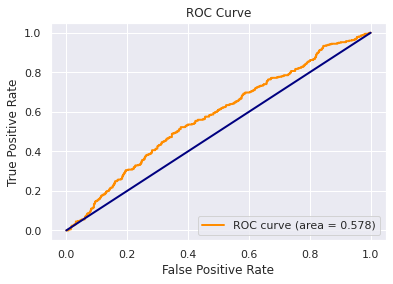

In [53]:
plot_roc(fpr_pew, tpr_pew, auc_pew)

The ROC curve indicates that the model is not very useful, as the AUC is only 0.489, which is close to 0.5, suggesting that the predictor is only slightly better than random guessing.

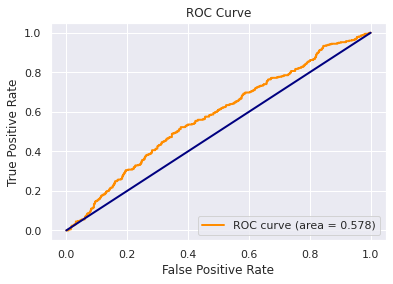

In [54]:
phat_train = mod.predict(exog=df_train)
df_train['phat_train']=phat_train
fpr_pew, tpr_pew, score_pew = roc_curve(y_true=df_train['y'], y_score=df_train['phat_train'])
auc_pew = roc_auc_score(y_true=df_train['y'], y_score=df_train['phat_train'])
plot_roc(fpr_pew, tpr_pew, auc_pew)

Even in the training set, the AUC is 0.578, which is only slightly better than the AUC for the test dataset. Therefore, we confirm that our initial explanatory variables have minimal impact on the number of songs charted more than or equal to 10.

However, if we were to select an appropriate predictive probability threshold, the point at approximately FPR = 0.2 and TPR = 0.3 would be a good choice. This is because our research goal is to determine whether certain levels of the explanatory variables result in a number of charted songs greater than or equal to 10, and therefore we prioritize minimizing false positives over false negatives.

In [49]:
from sklearn.metrics import confusion_matrix
def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh], 'tpr':[tpr], 'fpr':[fpr]})

In [50]:
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(df_test['y'], df_test['phat_test'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr  fpr
0       0.01  1.0  1.0
   threshold  tpr  fpr
0       0.02  1.0  1.0
   threshold  tpr  fpr
0       0.03  1.0  1.0
   threshold  tpr  fpr
0       0.04  1.0  1.0
   threshold  tpr  fpr
0       0.05  1.0  1.0
   threshold  tpr  fpr
0       0.06  1.0  1.0
   threshold  tpr  fpr
0       0.07  1.0  1.0
   threshold  tpr  fpr
0       0.08  1.0  1.0
   threshold  tpr  fpr
0       0.09  1.0  1.0
   threshold  tpr  fpr
0        0.1  1.0  1.0
   threshold  tpr  fpr
0       0.11  1.0  1.0
   threshold  tpr  fpr
0       0.12  1.0  1.0
   threshold  tpr  fpr
0       0.13  1.0  1.0
   threshold  tpr  fpr
0       0.14  1.0  1.0
   threshold  tpr  fpr
0       0.15  1.0  1.0
   threshold  tpr  fpr
0       0.16  1.0  1.0
   threshold  tpr  fpr
0       0.17  1.0  1.0
   threshold  tpr      fpr
0       0.18  1.0  0.99061
   threshold       tpr       fpr
0       0.19  0.989583  0.981221
   threshold       tpr       fpr
0        0.2  0.958

It looks like a predictive probability threshold of 0.36 will gve us a tpr=0.25 and a fpr=0.197183.

In [51]:
tpr_fpr_thresh(df_test['y'], df_test['phat_test'], 0.36)

,threshold,tpr,fpr
0,0.36,0.25,0.197183


**d)** Finally, discuss how your logistic regression analysis helps answer your research
question.

After examining the ROC and AUC of our final parsimonious logistic regression model, we found that it does not effectively predict whether songs will chart more than 10 times. Hence, we conclude that either our explanatory variables of danceability, energy, speechiness, duration, and valence are not reliable predictors of a song's success on the charts, or that there is no linear relationship between these variables and the categorical response variable.

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 6. Conclusion

a. Summarization: Summarize the findings of your individual research questions in
the conclusion. Provide at least a paragraph. (This will likely be a restatement of
what you have already included in your report).

First, we observed if there is an association between measures of loudness and energy, and how the association changes based on the number of streams. As a result, there is a linear relationship between those two measures, and the number of streams has minimal impact on the change in linear relationship.
Through our research, we have examined the effect of genre on the commercial success of a song, as defined by the number of streams it generates. In the case of the latin and pop genre, the 2 most popular genres in our dataset, the hypothesis test conducted showed that there was no statistically significant difference in the commercial success of a song based on genre. Furthermore, our attempt to fit a linear model to predict the highest charting position of a song based on aspects like valence, duration, danceability, and speechiness did not provide a good model; thus suggesting that the aforementioned attributes of a song can not be used to accurately predict how high the song will chart.
Lastly, our parsimonious logistic regression model to predict the song being successfully charted over 10 times using explanatory variables does slightly better job than randomly choosing. This suggests that our explanatory variables are not a good predictor of how successful the song is for being charted more than 10 times.

b. Future work: If you (or someone else) were to conduct future work based on
these analyses, what kind of research questions or analyses might that entail?

If someone were to conduct future work based on these analyses, the researcher could look at attributes of a song other than the one we examined to see if they would be a better predictor of a song's success as defined by its highest charting position. Since one of our analyses specifically focuses on fitting a linear model to predict the highest charting position, the researcher can try to fit other types of models and potentially use regularization or a random forest to prevent overfitting and improve the accuracy. In addition, in our research we only examined the two most popular genres in the top200 global Spotify songs for 2020-2021. It would be interesting to see someone explore and test other types of genre to see if some are more likely to generate more streams and become a hit compared to other genres. This could address the criticism of modern music "all sounding the same" with empirical data to back up the findings. Moreover, they could choose some other categorical response variable to predict rather than the one we used in our analysis for fitting the logistic regression model with different explanatory variables. Or even furthermore, it would be impressing to see a machine learning model that trains through top charted songs and outputs possible hit song.